In [ ]:
#CG Group_USING XGBOOST AND RANDOM FOREST

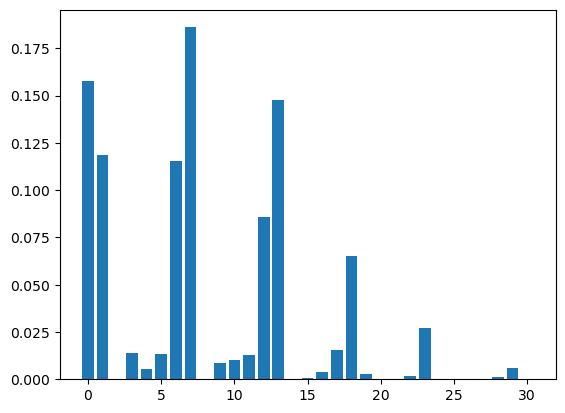

(54, 16) (36, 16) (54,) (36,)
Accuracy: 0.9166666666666666
Confusion Matrix:
[[24  2  0]
 [ 1  6  0]
 [ 0  0  3]]
Classification Report:
              precision    recall  f1-score   support

     Class 1       0.96      0.92      0.94        26
     Class 2       0.75      0.86      0.80         7
     Class 3       1.00      1.00      1.00         3

    accuracy                           0.92        36
   macro avg       0.90      0.93      0.91        36
weighted avg       0.92      0.92      0.92        36



In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the Data
data = pd.read_csv('C:/Users/sansk/OneDrive/Desktop/CapstoneCombine/extracted_1.csv')  # Replace with your dataset file

# Extract the class column
y = data.iloc[:, -1]  # Last column is the class column

# Encode class labels into numeric values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Drop the name columns (first two columns)
X = data.iloc[:, 2:-1]  # Exclude the first two columns and the last column

# Step 2: Preprocess Categorical Features (if any)
# If you have categorical features, one-hot encode them
#categorical_cols = ['categorical_column1', 'categorical_column2']  # Replace with your categorical column names
#X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Step 3: Impute Missing Values (if any)
#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(strategy='mean')  # You can choose a different imputation strategy if needed
#X = imputer.fit_transform(X)

# Step 4: Feature Selection using XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X, y)

# Visualize feature importance (optional)
importance = xgb_model.feature_importances_
plt.bar(range(len(importance)), importance)
plt.show()

# Step 5: Select Important Features
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(xgb_model, threshold='median')  # You can adjust the threshold as needed
selector.fit(X, y)
X_selected = selector.transform(X)

# Step 6: Use Random Forest as the Classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 7: Perform Classification using Random Forest and Selected Features
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.4, random_state=42)

# Ensure that X_train, X_test, y_train, and y_test have consistent shapes
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

random_forest_classifier.fit(X_train, y_train)

predictions = random_forest_classifier.predict(X_test)

# Step 8: Evaluate the Classifier and Create a Confusion Matrix
accuracy = accuracy_score(y_test, predictions)
confusion = confusion_matrix(y_test, predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion)

# You can also print a classification report for more detailed metrics
report = classification_report(y_test, predictions, target_names=label_encoder.classes_)
print("Classification Report:")
print(report)


In [5]:
print(X_selected)

[[28.47       25.4510921  25.542      ... 28.355      24.055
  21.924     ]
 [28.834      25.90863176 25.793      ... 28.652      24.077
  22.062     ]
 [30.589      28.07781812 28.027      ... 30.589      25.67
  24.596     ]
 ...
 [25.773      22.38756411 22.148      ... 25.752      20.828
  19.077     ]
 [30.769      28.51920085 28.611      ... 30.174      26.007
  26.705     ]
 [31.603      29.03866032 29.2125     ... 30.423      26.752
  26.081     ]]


In [4]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = predictions.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(20)

,Predicted Labels,Actual Labels
0,0,0
1,0,1
2,0,0
3,0,0
4,0,0
5,1,1
6,1,1
7,1,1
8,0,0
9,0,0
